### <font color='green'>**Ejercicio 2** </font>

Cargue la base de datos $titanic$ y efectúe:

1. Genere un histograma con la columna $age$.
2. Use el parámetro $hue$ para categorizar por $sex$.
3. Use el parámetro $stat$ con estado $percent$. ¿Qué sucede?
4. Use el parámetro $multiple$ con estado $layer$. ¿Qué sucede?
5. Cambie todas las etiquetas al español.
6. ¿Qué puede concluir con este diagrama?

***Ayuda 1:*** Puede que le sea útil el graficador $histplot$.   
***Ayuda 2:*** Implemente los métodos de personalización de Matplotlib.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [169]:
df.corr()

<ipython-input-169-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


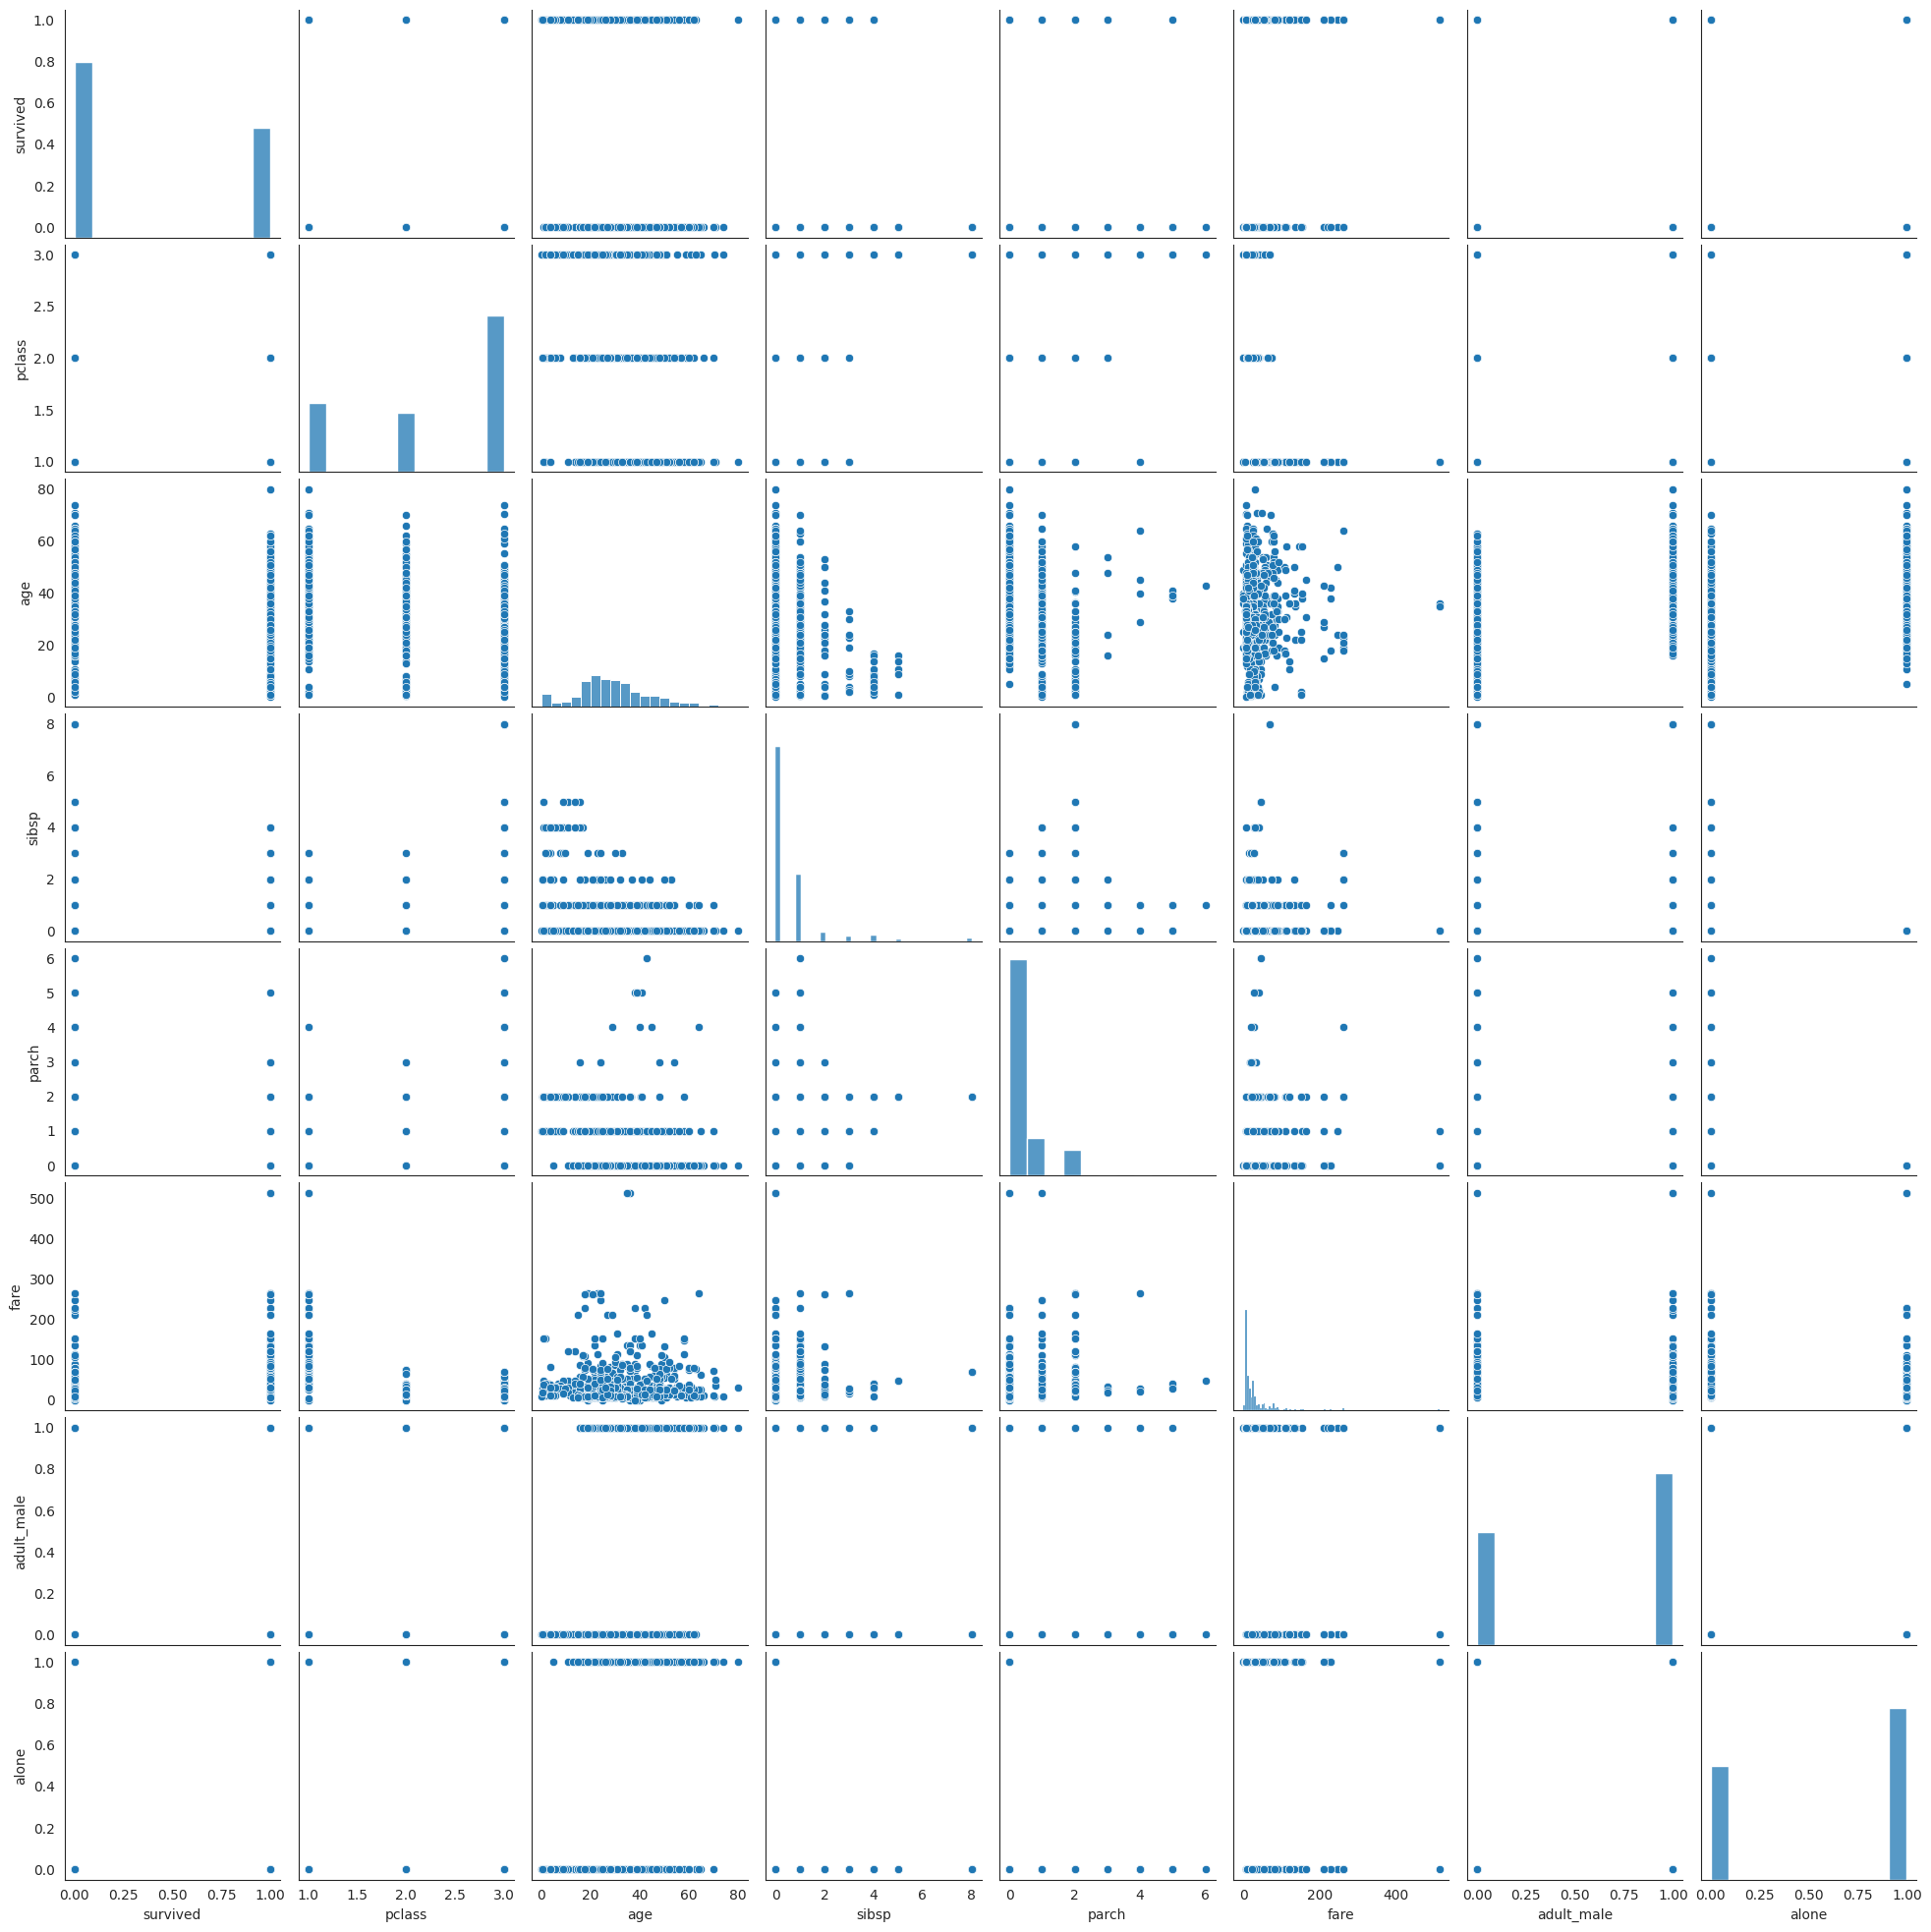

In [167]:
sns.pairplot(data=df)

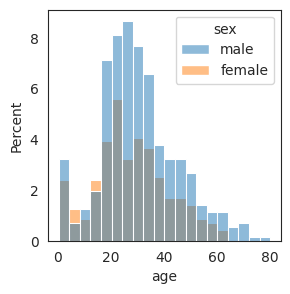

In [96]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.histplot(data=df, x='age', bins=20, hue='sex', multiple='layer', stat='percent')
fig.show()

Edades Promedio:

In [109]:
cond_eh = df.loc[:,'sex']=='male'
df.loc[cond_eh, 'age'].mean()

30.72664459161148

In [110]:
cond_em = df.loc[:,'sex']=='female'
df.loc[cond_em, 'age'].mean()

27.915708812260537

Cantidad de Hombres y Mujeres:

In [118]:
cantidad_sex = df.loc[:,'sex'].value_counts()
H = cantidad_sex['male']
M = cantidad_sex['female']
H,M

(577, 314)

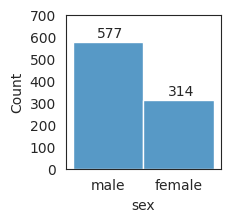

In [135]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
sns.histplot(data=df, x='sex')
ax.set_yticks(range(0,800,100))
ax.text(-0.15,H+20, f'{H:d}')
ax.text(0.85,M+20, f'{M:d}')
fig.show()

In [88]:
cond = df.loc[:, 'age']<=4
df_menores_iguales_4 = df.loc[cond, :]
df_menores_iguales_4.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False


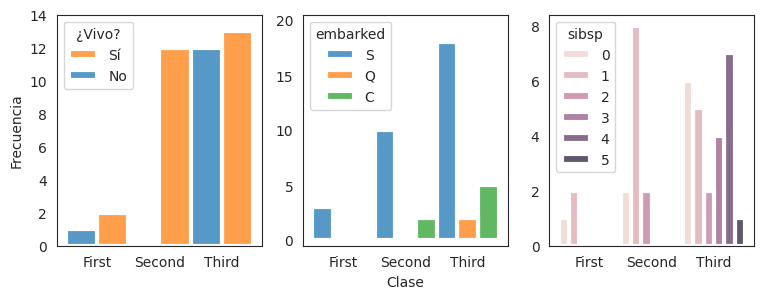

In [69]:
fig, ax = plt.subplots(1,3, figsize=(9,3))
sns.set_style("white")

sns.histplot(data=df_menores_iguales_4, x='class', hue='alive', multiple='dodge', linewidth=3.0, ax=ax[0])
ax[0].set_ylim([0,14]); ax[0].set_ylabel('Frecuencia'); ax[0].set_xlabel('')
ax[0].legend(title='¿Vivo?', labels=['Sí','No'])
#ax[0].set_xticklabels(['1ra','2da','3ra'])

sns.histplot(data=df_menores_iguales_4, x='class', hue='embarked', multiple='dodge', linewidth=3.0, ax=ax[1])
ax[1].set_ylim([-0.5,20.5]); ax[1].set_ylabel(''); ax[1].set_xlabel('Clase')

sns.histplot(data=df_menores_iguales_4, x='class', hue='sibsp', multiple='dodge', linewidth=3.0, ax=ax[2])
ax[2].set_ylabel(''); ax[2].set_xlabel('')

fig.show()

Para todas las categorías:

In [75]:
list(range(1,12,4))

[1, 5, 9]

In [77]:
list(range(4,16,4))

[4, 8, 12]

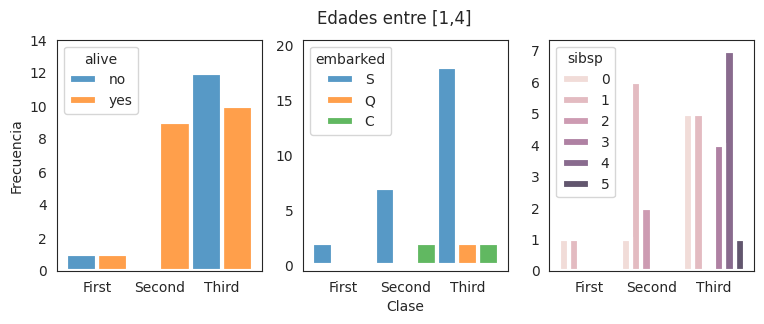

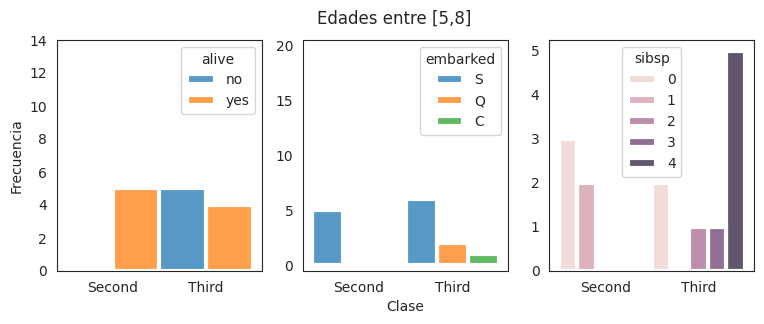

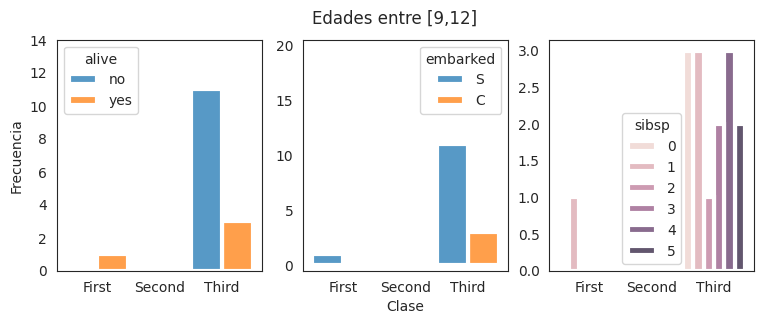

In [86]:
for i,j in zip(range(1,12,4), range(4,16,4)):
  cond = df.loc[:, 'age'].between(i,j) #[1,4], [5,8], [9,12]
  df_ = df.loc[cond, :] #Tabla

  fig, ax = plt.subplots(1,3, figsize=(9,3))
  sns.set_style("white")

  fig.suptitle(f'Edades entre [{i:d},{j:d}]')
  sns.histplot(data=df_, x='class', hue='alive', multiple='dodge', linewidth=3.0, ax=ax[0])
  ax[0].set_ylim([0,14]); ax[0].set_ylabel('Frecuencia'); ax[0].set_xlabel('')
  sns.histplot(data=df_, x='class', hue='embarked', multiple='dodge', linewidth=3.0, ax=ax[1])
  ax[1].set_ylim([-0.5,20.5]); ax[1].set_ylabel(''); ax[1].set_xlabel('Clase')
  sns.histplot(data=df_, x='class', hue='sibsp', multiple='dodge', linewidth=3.0, ax=ax[2])
  ax[2].set_ylabel(''); ax[2].set_xlabel('')

  fig.show()

In [90]:
cond = df.loc[:, 'age'].between(5,8)
df_menores_iguales_58 = df.loc[cond, :]
df_menores_iguales_58

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
233,1,3,female,5.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
237,1,2,female,8.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
278,0,3,male,7.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
448,1,3,female,5.0,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
549,1,2,male,8.0,1,1,36.7500,S,Second,child,False,NaN,Southampton,yes,False
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False


### <font color='green'>**Ejercicio Propuesto 7** </font>

Cargue el archivo *Libros.csv* y efectúe:

1. Genere un histograma con la columna $Price$.
2. Use el parámetro $hue$ para categorizar por $Genre$.
3. Use el parámetro $stat$ con estado $percent$.
4. Use el parámetro $multiple$ con estado $dodge$.
5. Cambie todas las etiquetas al español.
6. ¿Qué puede concluir con este diagrama?

***Ayuda 1:*** El archivo se encuentra en la carpeta *Datos/Pandas*.  
***Ayuda 2:*** Puede que le sea útil el graficador $histplot$.   
***Ayuda 3:*** Implemente los métodos de personalización de Matplotlib.

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [148]:
df = pd.read_csv('Libros.csv')
df

,Name,Author,Reviews,Price,Year,Genre
0,What Happened,Hillary Rodham Clinton,5492,18,2017,Non Fiction
1,The Help,Kathryn Stockett,13871,8,2011,Fiction
2,One Thousand Gifts: A Dare to Live Fully Right...,Ann Voskamp,3163,13,2012,Non Fiction
3,Unfreedom of the Press,Mark R. Levin,5956,11,2019,Non Fiction
4,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,2586,5,2014,Fiction
...,...,...,...,...,...,...
95,Good to Great: Why Some Companies Make the Lea...,Jim Collins,3457,14,2012,Non Fiction
96,The Pioneer Woman Cooks: A Year of Holidays: 1...,Ree Drummond,2663,17,2013,Non Fiction
97,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,23047,6,2018,Non Fiction
98,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4725,16,2017,Non Fiction


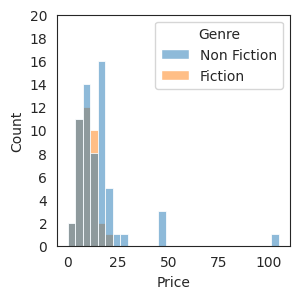

In [144]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.histplot(data=df, x='Price', hue='Genre')
ax.set_ylim([0,20])
ax.set_yticks(range(0,21,2))
fig.show()

In [149]:
cond = df.loc[:, 'Price']>100
df.loc[cond, :]

,Name,Author,Reviews,Price,Year,Genre
67,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,6679,105,2014,Non Fiction


In [ ]:
df.loc[:, 'Author'].value_counts()

In [ ]:
cond = df.loc[:, 'Author']=='Dr. Seuss'
df.loc[cond, :]

Sueños:

In [ ]:
cond = df.loc[:, 'Marca']=='Renault'
df_r = df.loc[cond, :]

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.histplot(data=df_r, x='Año', hue='Modelo')
fig.show()